# Linear Regression


In [139]:
%pylab inline
plt.style.use('ggplot')
plt.rcParams['image.interpolation'] = 'nearest'

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.7/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['f', 'minimum']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


$$ f(x) = x^4-4x^3+2 $$

In [140]:
f=lambda x: x**4-4*x**3+2

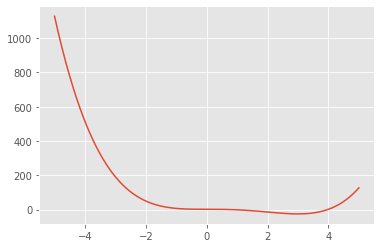

In [141]:
x=np.linspace(-5,5,1000)
y= f(x)
plt.plot(x,y)

### Brute-force Search
Lets do a brute-force search for the given variable in the limit.

In [142]:
minimum=+inf
mx=+inf
import numpy as np


for i in np.linspace(-5,5,1000):
    if f(i)<minimum:
        minimum=f(i)
        mx=i


print("Local minimum occurs at {}".format(mx))

Local minimum occurs at 2.997997997997998


###Gradient Descent

In [143]:
def f_derivative(x):
  
    # Calculate the derivative and write your code here
    first=(4*pow(x,3))
    derivative=first+12*pow(x,2)
    return derivative

In [144]:
x_old = 0
x_new = np.random.rand(1,1) 
eps = 0.01 # step size
precision = 0.00001

for i in np.linspace(-5,5):
    x_old=x_new
    x_new=x_old-f_derivative(x_old)*eps
    

print ("Local minimum occurs at", x_new)

Local minimum occurs at [[0.11827868]]


#### Always Check your gradient, before debugging gradient descent,

We know that $$\frac{\partial f}{\partial x}=\frac{f(x+\epsilon)-f(x)}{\epsilon}$$

So always compare the difference between computed gradient using this formula.


####Lets Check

In [145]:
eps=0.00001
x=1.5
dfx=(f(x+eps)-f(x))/eps
cdfx=f_derivative(x)

print (dfx, cdfx, dfx-cdfx)

-13.500044999936732 40.5 -54.00004499993673


###Let's generate some random data

In [146]:
X = np.arange(0,5,0.1, dtype=np.float32)
delta = np.random.uniform(-1,1, size=X.shape[0])
Y = .4 * X + 3 + delta

#making a copy for later use
rx = X
ry = Y

Text(0, 0.5, 'Y')

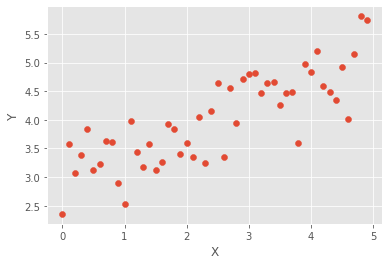

In [147]:
plt.scatter(X,Y)
plt.xlabel('X')
plt.ylabel('Y')

###Time for our regression implementation

$$
h(X, \theta) = X^T . \theta
$$

In [148]:
def hyp(theta, X):
  return np.dot(X,theta)
    

$$
cost = \frac{1}{2m} \sum_{i = 0}^m{(h(X^i, \theta)-Y^i)}^2
$$

In [149]:
def cost_function(theta,X,Y):
  # Mean squared error, do transpose here
  m = int(X.shape[0])
  cost = 0
  sum = 0
  
  for i in range(0,m):
    sum += pow(hyp(theta,X[i])-Y[i],2)
    
  cost = sum*(1/(2*m))   
  return cost

$$
\frac{\delta}{\delta \theta_j} = \frac{1}{m} \sum_{i = 0}^m{(h(X^i, \theta)-Y^i)} * X_j
$$

In [150]:
def derivative_cost_function(theta,X,Y):
  m = X.shape[0]
  sum = 0
  for i in range(0,m):
    sum += np.dot((hyp(theta,X[i])-Y[i]),X[i])

  cost = sum*(1/m) 
  return cost


*** Give Temporary values to cost function and derivative cost function before getting onto gradiant descent***

*** To make sure that your both function are working fine ***

In [151]:
print (X.shape)
nx=np.hstack((X,ones(len(X),)))
nx=nx.reshape((2,X.shape[0])).T
print (nx.shape)

(50,)
(50, 2)


In [152]:
np.random.seed(20) # To make sure you have the same value as me
eps=0.0001
nexamples=float(nx.shape[0])
thetas=np.random.rand(nx.shape[1],)
print (thetas)

[0.5881308  0.89771373]


In [153]:
cf=cost_function(thetas,nx,Y)
print (cf)

1.5341374520563766


In [154]:
ad=derivative_cost_function(thetas,nx,Y)
print (ad)

[-3.79788165 -1.67825806]


In [155]:
#Gradient Descent...
def GradientDescent(X,Y,maxniter=20000):
    nexamples=float(X.shape[0])
    thetas=rand(X.shape[1],)
 
    alpha=0.01
    numiter=400
    theta=0
    # Your code here
    xTrans = X.transpose()
    for i in range(0, numiter):

      cost = cost_function(thetas, X ,Y)
      print("Iteration: ", i, " Cost: ", cost)
      gradient = derivative_cost_function(thetas, X , Y)

      thetas = thetas - alpha * gradient
    return thetas

In [156]:
theta_new=GradientDescent(nx,Y)

Iteration:  0  Cost:  0.8338789777766223
Iteration:  1  Cost:  0.8010569418350183
Iteration:  2  Cost:  0.7733596119375663
Iteration:  3  Cost:  0.7499220926558605
Iteration:  4  Cost:  0.7300257864990286
Iteration:  5  Cost:  0.7130736459157933
Iteration:  6  Cost:  0.6985696117155646
Iteration:  7  Cost:  0.6861015297258253
Iteration:  8  Cost:  0.6753269573006198
Iteration:  9  Cost:  0.6659613708273341
Iteration:  10  Cost:  0.6577683680742635
Iteration:  11  Cost:  0.6505515279278279
Iteration:  12  Cost:  0.6441476471521891
Iteration:  13  Cost:  0.6384211212315175
Iteration:  14  Cost:  0.6332592757596441
Iteration:  15  Cost:  0.6285684875806891
Iteration:  16  Cost:  0.6242709620848442
Iteration:  17  Cost:  0.6203020556628467
Iteration:  18  Cost:  0.6166080510990383
Iteration:  19  Cost:  0.6131443092830453
Iteration:  20  Cost:  0.6098737335812952
Iteration:  21  Cost:  0.6067654939782238
Iteration:  22  Cost:  0.6037939670440353
Iteration:  23  Cost:  0.6009378552193719
It

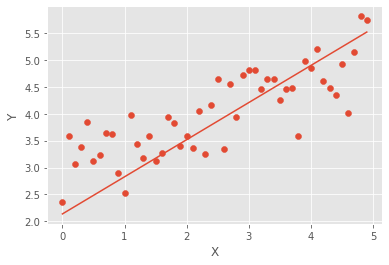

In [157]:
plt.scatter(X,Y)
plt.xlabel('X')
plt.ylabel('Y')
plt.plot(nx[:,0],np.dot(nx,theta_new))